## Important Imports 

In [11]:
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from pprint import pprint

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Reading dataset

In [2]:
data_full=pd.read_csv('dataset.csv')
data_full.head()

,source,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10
0,0,2,5,2,5,6,2,1,8,1,3
1,1,1747,1749,1751,1758,1765,1767,1772,1774,1783,1785
2,2,65056,195168,1561344,7806720,31226880,187361280,749445120,6745006080,6745006080,6745006080
3,3,2855,2860,2865,2870,2875,2880,2885,2890,2895,2900
4,4,11440,57200,286000,1430000,7150000,35750000,178750000,893750000,4468750000,22343750000


In [3]:
data_full.shape

(500000, 11)

In [161]:
data_full.groupby(['source']).count()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10
source,,,,,,,,,,
0,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
1,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
2,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
3,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
4,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000


### Important Functions

In [4]:
def model_selection_function(data):
    seed = 7
    X_train=data.iloc[:,1:]
    y=data.iloc[:,0]
    from sklearn.model_selection import train_test_split
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, y, test_size = 0.1, random_state=seed)
    from sklearn.preprocessing import StandardScaler
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_val = feature_scaler.transform(X_val)
    num_folds = 10
    scoring = 'accuracy'
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DecisionTree', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))

    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [8]:
# data.iloc[:,0]

In [162]:
data_full.isnull().any().describe()

count        11
unique        1
top       False
freq         11
dtype: object

In [5]:
def tune_Decision_tree(data):
    max_depths = list(np.linspace(2000, 2600,7))
    min_samples_splits = list(np.linspace(2, 10, 9, endpoint=True,dtype=np.int32))
    min_samples_leafs = list(np.linspace(1, 10, 10, endpoint=True, dtype=np.int32))
    max_features = list(range(1,data.shape[1]))
    random_grid = {
            'max_depth': max_depths,
            'min_samples_split': min_samples_splits,
             'min_samples_leaf': min_samples_leafs,
            'max_features': max_features
                   }
    pprint(random_grid)
    seed = 7
    X_train=data.iloc[:,1:]
    y=data.iloc[:,0]
    from sklearn.model_selection import train_test_split
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, y, test_size = 0.1, random_state=seed)
    from sklearn.preprocessing import StandardScaler
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_val = feature_scaler.transform(X_val)
    model = DecisionTreeClassifier()
    dt = RandomizedSearchCV(estimator = model, param_distributions = random_grid, 
                                   n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
    dt.fit(X_train, Y_train)
    print("Best params of the model ")
    pprint(dt.best_params_)
    return dt

In [6]:
def train_and_test(data,model):
    seed = 7
    X_train=data.iloc[:,1:]
    y=data.iloc[:,0]
    from sklearn.model_selection import train_test_split
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, y, test_size = 0.1, random_state=seed)
    from sklearn.preprocessing import StandardScaler
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_val = feature_scaler.transform(X_val)
    model.fit(X_train,Y_train)
    y_pred_X = model.predict(X_train)
    train_accuracy=accuracy_score(Y_train, y_pred_X)
    print('Training accuracy is {}'.format(train_accuracy))

    y_pred_Val = model.predict(X_val)
    test_accuracy=accuracy_score(Y_val, y_pred_Val)
    print('Test accuracy is {}'.format(test_accuracy))
    return train_accuracy,test_accuracy

In [248]:
def train_and_test_cv(data, model):
    X_train=data.iloc[:,1:]
    y=data.iloc[:,0]
    from sklearn.model_selection import train_test_split
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, y, test_size = 0.1, random_state=seed)
    from sklearn.preprocessing import StandardScaler
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_val = feature_scaler.transform(X_val)
    num_folds=10
    kfold = KFold(n_splits=num_folds, random_state=seed)
    result=cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    print(result)

### Boxplot for checking outlier

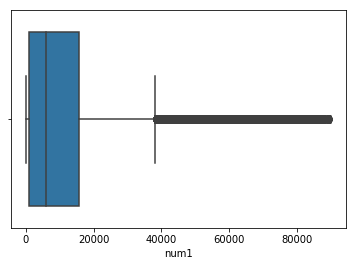

In [86]:
import seaborn as sns
sns.boxplot(x=data['num1'])

In [87]:
data.describe()

,source,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,2.000000,11950.083060,51685.411310,2.504422e+05,1.245107e+06,6.187386e+06,3.077006e+07,1.520312e+08,7.612703e+08,3.833144e+09,1.938922e+10
std,1.414221,15613.825993,89605.871215,4.977602e+05,2.764550e+06,1.523474e+07,8.378160e+07,4.521829e+08,2.498748e+09,1.417347e+10,8.046135e+10
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,996.750000,1199.000000,1.257000e+03,1.275000e+03,1.285750e+03,1.291000e+03,1.297000e+03,1.302000e+03,1.308000e+03,1.312000e+03
50%,2.000000,5990.000000,7050.000000,7.407500e+03,7.507000e+03,7.533000e+03,7.548500e+03,7.556500e+03,7.562000e+03,7.567000e+03,7.572000e+03
75%,3.000000,15805.000000,69462.750000,3.099600e+05,1.395625e+06,6.330012e+06,2.860762e+07,1.311399e+08,5.961233e+08,2.716737e+09,1.239949e+10
max,4.000000,89982.000000,808461.000000,7.034121e+06,5.539817e+07,4.724970e+08,2.411929e+09,1.804281e+10,1.205850e+11,6.805696e+11,5.927438e+12


### Function TO Remove Outlier

In [7]:
def remove_outlier(data):
    q1=data.quantile(0.25)
    q3=data.quantile(.75)
    iqr=q3-q1
    data_out=data[~((data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))).any(axis=1)]
    print('shape of dataset after removing outleir is ',data_out.shape)
    return data_out

### Model Comparision 

In [14]:
data_out= remove_outlier(data_full) # remove outlier from the data


model_selection_function(data_out)

shape of dataset after removing outleir is  (380055, 11)
LR 0.704153 0.002699 
LDA 0.581659 0.002091 
KNN 0.877275 0.001546 
DecisionTree 0.966528 0.000729 
NB 0.691278 0.002139 
RF 0.851205 0.019897 


### XGboost Model

In [171]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
train_and_test(data_out,xgb_clf)

Training accuracy is 0.7308338863730051
Test accuracy is 0.7251486607377783


### Since best model is decision tree so we will tune the parameter of the decision tree 

In [205]:
model=DecisionTreeClassifier()
pprint(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


### Max Depth of tree 

Training accuracy is 0.731102853684706
Test accuracy is 0.7248329211177182
max_depth  10.0
Training accuracy is 0.736654689825142
Test accuracy is 0.7315160764089881
max_depth  20.0
Training accuracy is 0.7402243538206514
Test accuracy is 0.734936588959638
max_depth  30.0
Training accuracy is 0.7414844072048157
Test accuracy is 0.735989054359838
max_depth  40.0
Training accuracy is 0.7424959581814301
Test accuracy is 0.7371204546650529
max_depth  50.0
Training accuracy is 0.7432677774237024
Test accuracy is 0.7381729200652528
max_depth  60.0
Training accuracy is 0.7444196591716391
Test accuracy is 0.7391464505604378
max_depth  70.0
Training accuracy is 0.7455598466886323
Test accuracy is 0.7403304741356628
max_depth  80.0
Training accuracy is 0.7465626269920391
Test accuracy is 0.7411724464558228
max_depth  90.0
Training accuracy is 0.7474309236395955
Test accuracy is 0.7418039256959428
max_depth  100.0
Training accuracy is 0.7535031530570181
Test accuracy is 0.7473819923170025
max_dep

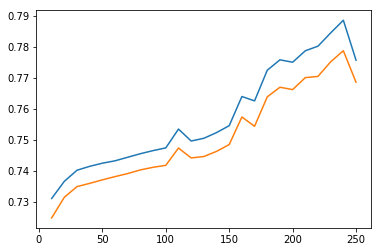

In [217]:
max_depths = np.linspace(10, 250,25)
train_results = []
test_results = []
for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)
    a,b=train_and_test(data_out,model)
    print('max_depth ',max_depth)
    train_results.append(a)
    test_results.append(b)
line1=plt.plot(max_depths,train_results)
line2=plt.plot(max_depths,test_results)
plt.show()

Training accuracy is 0.7912872132355305
Test accuracy is 0.7810345734883966
max_depth  250.0
Training accuracy is 0.7940470517382012
Test accuracy is 0.7840077882439614
max_depth  260.0
Training accuracy is 0.8000520393276986
Test accuracy is 0.7902699573751513
max_depth  270.0
Training accuracy is 0.8030428388915039
Test accuracy is 0.7927958743356313
max_depth  280.0
Training accuracy is 0.8027007826364059
Test accuracy is 0.7934010419407462
max_depth  290.0
Training accuracy is 0.8103926630395061
Test accuracy is 0.799400094721886
max_depth  300.0
Training accuracy is 0.8124859303783961
Test accuracy is 0.801057727727201
max_depth  310.0
Training accuracy is 0.8158860280252245
Test accuracy is 0.8046624217228858
max_depth  320.0
Training accuracy is 0.8178448117082641
Test accuracy is 0.8061358732831658
max_depth  330.0
Training accuracy is 0.8181079319044933
Test accuracy is 0.8071883386833658
max_depth  340.0
Training accuracy is 0.8208385348298051
Test accuracy is 0.8090564647687

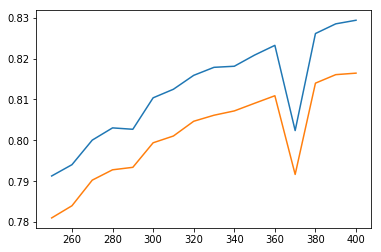

In [219]:
max_depths = np.linspace(250, 400,16)
train_results = []
test_results = []
for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)
    a,b=train_and_test(data_out,model)
    print('max_depth ',max_depth)
    train_results.append(a)
    test_results.append(b)
line1=plt.plot(max_depths,train_results)
line2=plt.plot(max_depths,test_results)
plt.show()

Training accuracy is 0.9934132244210625
Test accuracy is 0.9636110087880861
max_depth  2200.0
Training accuracy is 0.9999649173071694
Test accuracy is 0.9702152291743409
max_depth  2400.0
Training accuracy is 0.9999649173071694
Test accuracy is 0.9704257222543808
max_depth  2600.0
Training accuracy is 0.9999649173071694
Test accuracy is 0.9700573593643109
max_depth  2800.0
Training accuracy is 0.9999649173071694
Test accuracy is 0.969952112824291
max_depth  3000.0


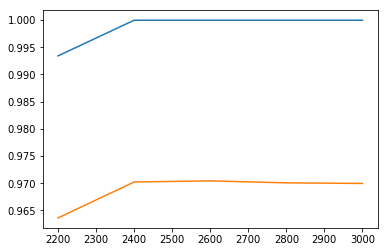

In [226]:
max_depths = np.linspace(2200, 3000,5)
train_results = []
test_results = []
for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)
    a,b=train_and_test(data_out,model)
    print('max_depth ',max_depth)
    train_results.append(a)
    test_results.append(b)
line1=plt.plot(max_depths,train_results)
line2=plt.plot(max_depths,test_results)
plt.show()

### Optimal Value for the max_depths is 2400 from the above graph, which gives Training accuracy of 0.99996 and Test accuracy is 0.97042

### Tuning Min sample split

min sample split   2
Training accuracy is 0.9999649173071694
Test accuracy is 0.9697679313792559
min sample split   3
Training accuracy is 0.9999561466339618
Test accuracy is 0.9702415408093459
min sample split   4
Training accuracy is 0.9999298346143389
Test accuracy is 0.969952112824291
min sample split   5
Training accuracy is 0.9998099687471678
Test accuracy is 0.969899489554281
min sample split   6
Training accuracy is 0.9996023961479203
Test accuracy is 0.9692943219491659
min sample split   7
Training accuracy is 0.9992311043154636
Test accuracy is 0.968452349629006
min sample split   8
Training accuracy is 0.9986346985373441
Test accuracy is 0.968399726358996
min sample split   9
Training accuracy is 0.9980499869901681
Test accuracy is 0.967899805293901
min sample split   10
Training accuracy is 0.9972781677478958
Test accuracy is 0.966821028258696


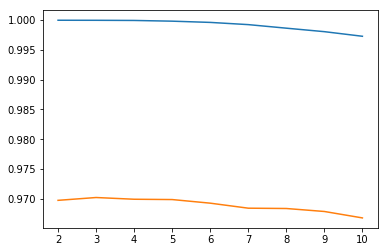

In [227]:
min_samples_splits = np.linspace(2, 10, 9, endpoint=True,dtype=np.int32)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = DecisionTreeClassifier(max_depth=2400,min_samples_split=min_samples_split)
    print('min sample split  ',min_samples_split)
    a,b=train_and_test(data_out,model)
    train_results.append(a)
    test_results.append(b)
line1=plt.plot(min_samples_splits,train_results)
line2=plt.plot(min_samples_splits,test_results)
plt.show()

### Min sample split 3 gives best result :Training accuracy is 0.99995 and Test accuracy is 0.97024

### Min Sample Leaf 

min sample leaf   1
Training accuracy is 0.9999561466339618
Test accuracy is 0.969425880124191
min sample leaf   2
Training accuracy is 0.9939423883712567
Test accuracy is 0.9597958217123612
min sample leaf   3
Training accuracy is 0.985025537276823
Test accuracy is 0.9478240277850866
min sample leaf   4
Training accuracy is 0.9741323611529342
Test accuracy is 0.9364837130979319
min sample leaf   5
Training accuracy is 0.9633064268569708
Test accuracy is 0.9210914066200073
min sample leaf   6
Training accuracy is 0.9517028262032633
Test accuracy is 0.9105141293479977
min sample leaf   7
Training accuracy is 0.9411575534499443
Test accuracy is 0.898200284165658
min sample leaf   8
Training accuracy is 0.9300655754000158
Test accuracy is 0.8822028100826186
min sample leaf   9
Training accuracy is 0.9200582372700987
Test accuracy is 0.8709151186654739
min sample leaf   10
Training accuracy is 0.9115185251235934
Test accuracy is 0.8618112929537441


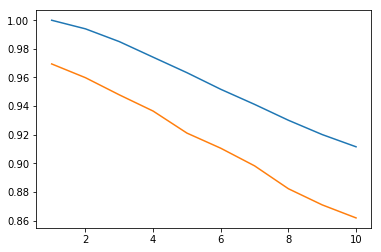

In [230]:
min_samples_leafs = np.linspace(1, 10, 10, endpoint=True, dtype=np.int32)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, min_samples_split=3, max_depth=2400)
    print('min sample leaf  ',min_samples_leaf)
    a,b=train_and_test(data_out,model)
    train_results.append(a)
    test_results.append(b)
line1=plt.plot(min_samples_leafs,train_results)
line2=plt.plot(min_samples_leafs,test_results)
plt.show()

### Min sample leaf 1 gives best result

### Max Features 

max_features   1
Training accuracy is 0.7367833263655207
Test accuracy is 0.7373572593800979
max_features   2
Training accuracy is 0.7404436206508425
Test accuracy is 0.7353312634847129
max_features   3
Training accuracy is 0.7368242561738231
Test accuracy is 0.7373835710151029
max_features   4
Training accuracy is 0.7817417972278825
Test accuracy is 0.7734831342419618
max_features   5
Training accuracy is 0.99995029951849
Test accuracy is 0.9725832763247908
max_features   6
Training accuracy is 0.9999619937494335
Test accuracy is 0.9715308109245908
max_features   7
Training accuracy is 0.9999561466339618
Test accuracy is 0.9715571225595958
max_features   8
Training accuracy is 0.9999561466339618
Test accuracy is 0.9697942430142609
max_features   9
Training accuracy is 0.9999561466339618
Test accuracy is 0.9696626848392359
max_features   10
Training accuracy is 0.9999561466339618
Test accuracy is 0.9705835920644109


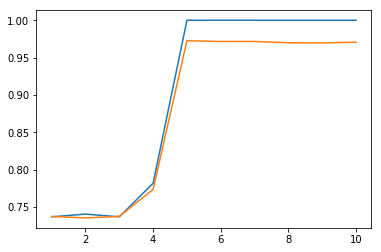

In [229]:
max_features = list(range(1,data_out.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    model = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=3, max_depth=2400, max_features=max_feature)
    print('max_features  ',max_feature)
    a,b=train_and_test(data_out,model)
    train_results.append(a)
    test_results.append(b)
line1=plt.plot(max_features,train_results)
line2=plt.plot(max_features,test_results)
plt.show()

### From the above curve optimal value for the max features is 5

### Prediction after getting best parameter of decision Tree 

In [231]:
model = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=3, max_depth=2400, max_features=5)
train_and_test(data_out,model)

Training accuracy is 0.9999444524030183
Test accuracy is 0.9713729411145609


(0.9999444524030183, 0.9713729411145609)

In [212]:
data_out.shape

(380055, 11)

### Parameter tuning of DecisionTree Using RandomizedSearchCV

In [12]:
dt=tune_Decision_tree(data_out)

{'max_depth': [2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 63.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 162.2min finished


Best params of the model 
{'max_depth': 2400.0,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 6}


### Training and Testing of decision tree after getting best params by RamdomizeSearchCV

In [13]:
model = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=6, max_depth=2400, max_features=6)
train_and_test(data_out,model)

Training accuracy is 0.9995205365313157
Test accuracy is 0.9709519549544808


(0.9995205365313157, 0.9709519549544808)

In [ ]:
model = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2, max_depth=2100, max_features=9)
train_and_test_cv(data_out,model)